In [2]:
import pandas as pd
import requests

In [8]:
headers = {'authorization': 'see file'}
base_url = "https://public.enigma.com/api/"

In [9]:
def print_top_level_collections():
    url = base_url + "collections/"
    r = requests.get(url, headers=headers)
    collections = r.json()
    for collection in collections:
        print (collection['display_name'])
        print (collection['description_short'])
        print (collection['id'] + "\n")

In [10]:
print_top_level_collections()

United States
Data concerning, or published by, the federal government of the United States of America.
41026df2-2db0-41b1-8d7f-5a6c8e34de62

Governments
Data published by governments outside of the U.S., from Barbados to the Philippines and Pakistan.
651a30cd-c864-49ca-8d8b-9418029127db

Curated Collections
Datasets curated by Enigma.
52dfb31c-f22e-49fb-bc05-8f5d8a5e7cab

Companies
Data sources that come from companies or commercial data.
5f8faa60-e6c3-4dc0-8eea-ade8c81d1265

Organizations
Data published by non-governmental organizations.
bc5c2c88-687e-4da2-93c3-32237ece39f0

Universities
Data published by Universities and Academic Institutions
c396139e-d685-4311-a447-2dd7669d963a



In [14]:
def find_current_snapshot_id(dataset_id):
    url = base_url + "datasets/" + dataset_id
    r = requests.get(url, headers=headers)
    dataset = r.json()
    return dataset['current_snapshot']['id']

In [15]:
def snapshots_in_collection(collection_id):
    url = base_url + "datasets/?parent_collection_id=" + collection_id
    r = requests.get(url, headers=headers)
    datasets = r.json()
    return [
        dataset['current_snapshot']['id']
        for dataset in datasets
            if dataset['current_snapshot'] is not None
        ]

In [16]:
def get_matching_rows(snapshot_id, search_string):
    url = base_url + "snapshots/" + snapshot_id + "?row_limit=1000&query=" + search_string
    r = requests.get(url, headers=headers)
    snapshot = r.json()
    return snapshot['table_rows']['rows']

In [17]:
def get_matching_rows(snapshot_id, search_string, field_index):
    url = base_url + "snapshots/" + snapshot_id + "?row_limit=1000&query=" + search_string
    r = requests.get(url, headers=headers)
    snapshot = r.json()
    rows = snapshot['table_rows']['rows']
    return [
        row
        for row in rows if search_string in row[field_index].lower()
        ]

In [18]:
def get_dataset_ids_in_collection(collection_id, max):
    url = base_url + "datasets/?parent_collection_id=" + collection_id
    headers['Range'] = 'resources=%d-%d' % (0, max - 1)
    r = requests.get(url, headers = headers)
    datasets = r.json()
    return [
        dataset['id']
        for dataset in datasets
        ]

In [19]:
def get_all_datasets_in_collection(collection_id):
    url = base_url + "datasets/?parent_collection_id=" + collection_id
    r = requests.head(url, headers = headers)
    num_datasets = int(r.headers.get('content-range').split("/")[1])
    dataset_ids = []
    for start in range(0, num_datasets, 10):
        headers['Range'] = 'resources=%d-%d' % (start, start + 9)
        r = requests.get(url, headers=headers)
        datasets = r.json()
        for dataset in datasets:
            dataset_ids.append(dataset['id'])
    return dataset_ids

In [23]:
ids = "0293cd20-8580-4d30-b173-2ac27952b74b"

get_all_datasets_in_collection("0293cd20-8580-4d30-b173-2ac27952b74b")

[]

In [24]:
get_dataset_ids_in_collection(ids, 1000)

[]

In [25]:
url = "https://public.enigma.com/api/snapshots/f846c6ef-b86a-4c74-ae24-f4a77969d292?&query_mode=advanced&query=(praxair)%20%26%26%20(description_text%3A(helium))&row_limit=200&row_offset=0&include_serialids=true"

In [26]:
r = requests.get(url, headers=headers)
collections = r.json()

In [30]:
collections

{'created_at': '2018-05-20T05:55:53.562783+00:00',
 'dataset': {'created_at': '2017-06-20T21:19:39.712048+00:00',
  'description': "Bills of lading header information for incoming shipments regulated by U.S. Customs and Border Protection's Automated Manifest System (AMS) for 2017.",
  'description_short': "Bills of lading header information for incoming shipments regulated by U.S. Customs and Border Protection's Automated Manifest System (AMS) for 2017.",
  'display_name': 'Bill of Lading Summary - 2017',
  'id': '0293cd20-8580-4d30-b173-2ac27952b74b',
  'key_value': {},
  'modified_at': '2018-05-20T20:38:37.583664+00:00',
  'published': True},
 'end_date': None,
 'fields': [{'data_type': 'string',
   'description': 'An Enigma assigned serial id.',
   'display_name': 'Enigma Serial ID',
   'is_serialid': True,
   'name': 'serial_f846c6ef_b86a_4c74_ae24_f4a77969d292',
   'visible_by_default': True},
  {'data_type': 'string',
   'description': 'Unique shipment identifier. Can be used as 

In [29]:
for collection in collections:
    #print (collection['display_name'])
    print (collection['description_short'])
    print (collection['id'] + "\n")

TypeError: string indices must be integers

In [3]:
df = pd.read_csv("praxair_data.csv", index_col="year")
df.head()

,tri_facility_id,facility_name,street_address,city,county,st,zip,bia_code,tribe,latitude,...,n_8_4_recycling_on_site,n_8_5_recycling_off_site,n_8_6_treatment_on_site,n_8_7_treatment_off_site,production_waste_8_1_thru_8_7,n_8_8_one_time_release,n_8_9_production_ratio,parent_company_name,parent_company_db_number,serialid
year,,,,,,,,,,,,,,,,,,,,,
2014,7702WPRXRD131LA,PRAXAIR DISTRIBUTION INC,1301 LATHROP,HOUSTON,HARRIS,TX,77020,NaN,NaN,29.764820,...,0,0,0,0,810,NaN,NaN,PRAXAIR INC,197154586,239
2014,77041SRMTC7615F,PRAXAIR SURFACE TECHNOLOGIES INC,7615 FAIRVIEW ST,HOUSTON,HARRIS,TX,77041,NaN,NaN,29.889120,...,0,0,0,0,164,0.0,0.82,PRAXAIR INC,197154586,531
2014,77642PRXRN21HUS,PRAXAIR INC PORT ARTHUR HYDROGEN FACILITY 497,2555 SAVANNAH AVE,PORT ARTHUR,JEFFERSON,TX,77640,NaN,NaN,29.884818,...,0,0,0,0,22869,NaN,0.92,PRAXAIR INC,197154586,854
2014,77590PRXRN172GR,PRAXAIR INC,1720 GRANT AVE GATE 16,TEXAS CITY,GALVESTON,TX,77590,NaN,NaN,29.365859,...,0,0,0,0,43221,NaN,0.99,PRAXAIR INC,197154586,3696
2014,77037TXSWL10210,PRAXAIR DISTRIBUTION INC (FORMERLY TEXAS WELDE...,10210 I-45 N,HOUSTON,HARRIS,TX,77037,NaN,NaN,29.915200,...,0,0,0,0,5928,NaN,1.20,PRAXAIR INC,197154586,4552


In [4]:
df[["facility_name", "latitude", "longitude"]]

,facility_name,latitude,longitude
year,,,
2014,PRAXAIR DISTRIBUTION INC,29.764820,-95.300760
2014,PRAXAIR SURFACE TECHNOLOGIES INC,29.889120,-95.595700
2014,PRAXAIR INC PORT ARTHUR HYDROGEN FACILITY 497,29.884818,-93.965355
2014,PRAXAIR INC,29.365859,-94.936113
2014,PRAXAIR DISTRIBUTION INC (FORMERLY TEXAS WELDE...,29.915200,-95.412150
2014,PRAXAIR PORT ARTHUR 2,29.890280,-93.936800


In [5]:
df1 = pd.read_csv("linde_data.csv", index_col="year")
df1.head()

,tri_facility_id,facility_name,street_address,city,county,st,zip,bia_code,tribe,latitude,...,n_8_4_recycling_on_site,n_8_5_recycling_off_site,n_8_6_treatment_on_site,n_8_7_treatment_off_site,production_waste_8_1_thru_8_7,n_8_8_one_time_release,n_8_9_production_ratio,parent_company_name,parent_company_db_number,serialid
year,,,,,,,,,,,,,,,,,,,,,
2014,77571LNDGS11603,LINDE GAS NA LLC,11603 STRANG RD,LA PORTE,HARRIS,TX,77571,NaN,NaN,29.706291,...,0,0,0,0.0,7.00,NaN,1.03,LINDE N.A. INC,NaN,1381
2014,77571LNDGS11603,LINDE GAS NA LLC,11603 STRANG RD,LA PORTE,HARRIS,TX,77571,NaN,NaN,29.706291,...,0,0,0,0.0,6792.80,NaN,1.03,LINDE N.A. INC,NaN,2809
2014,77571LNDGS11603,LINDE GAS NA LLC,11603 STRANG RD,LA PORTE,HARRIS,TX,77571,NaN,NaN,29.706291,...,0,0,0,0.0,1185.00,NaN,1.03,LINDE N.A. INC,NaN,2983
2014,77571LNDGS11603,LINDE GAS NA LLC,11603 STRANG RD,LA PORTE,HARRIS,TX,77571,NaN,NaN,29.706291,...,0,0,0,0.0,5.25,NaN,1.03,LINDE N.A. INC,NaN,3243
2014,77507BCGSS952BA,LINDE GAS NA LLC,9502 BAY PORT BLVD,PASADENA,HARRIS,TX,77507,NaN,NaN,29.625000,...,0,0,202280,193659.0,2999711.00,NaN,1.02,LINDE LLC,1368141.0,7091


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
#if PIL does not import go to image.py and add core. before PILLOW
#https://github.com/amueller/word_cloud/issues/225

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [96]:
for a in range(len(df.index)):
    print (a)

0
1
2
3
4
5


In [99]:
#df[["facility_name", "latitude", "longitude"]]
df.iloc[1]["facility_name"]

'PRAXAIR SURFACE TECHNOLOGIES INC'

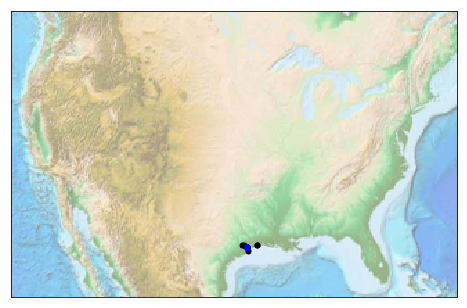

In [136]:
fig = plt.figure(figsize=(8, 8))

lower_long = -119
left_lat = 22
upper_long = -64
right_lat = 49

m = Basemap(llcrnrlon=lower_long,llcrnrlat=left_lat,urcrnrlon=upper_long,urcrnrlat=right_lat,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting

#Praxair
for a in range(len(df.index)):
    name = a
    long = df.iloc[a]["longitude"]
    lat = df.iloc[a]["latitude"]
    x, y = m(long, lat)
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, name, fontsize=12);

#Linde
for a in range(len(df1.index)):
    name = a
    long = df1.iloc[a]["longitude"]
    lat = df1.iloc[a]["latitude"]
    x, y = m(long, lat)
    plt.plot(x, y, 'ok', markersize=5, color="b")
    #plt.text(x, y, name, fontsize=12);

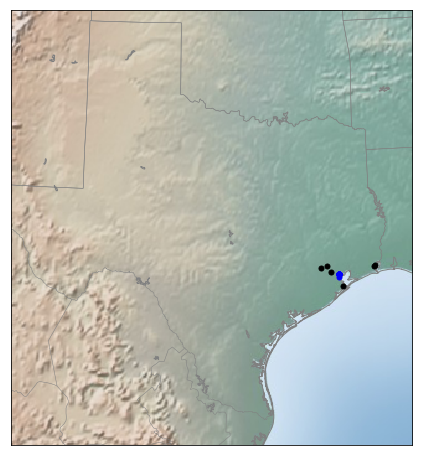

In [137]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))

#Texas
lat = 31
lon = -99
w = 1.2E6
h = 1.3E6

m = Basemap(projection='lcc', resolution='h', 
            lat_0=lat, lon_0=lon,
            width=w, height=h)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Map (long, lat) to (x, y) for plotting

for a in range(len(df.index)):
    name = a
    long = df.iloc[a]["longitude"]
    lat = df.iloc[a]["latitude"]
    x, y = m(long, lat)
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, name, fontsize=12);

#Linde
for a in range(len(df1.index)):
    name = a
    long = df1.iloc[a]["longitude"]
    lat = df1.iloc[a]["latitude"]
    x, y = m(long, lat)
    plt.plot(x, y, 'ok', markersize=5, color="b")
    #plt.text(x, y, name, fontsize=12);

In [208]:
df2 = pd.read_csv("praxair_street_data.csv")
df2.head()

,serial_f846c6ef_b86a_4c74_ae24_f4a77969d292,identifier,trade_update_date,run_date,vessel_name,port_of_unlading,estimated_arrival_date,foreign_port_of_lading,record_status_indicator,place_of_receipt,...,shipper_comm_number_qualifier,shipper_comm_number,container_number,description_sequence_number,piece_count,description_text,harmonized_number,harmonized_value,harmonized_weight,harmonized_weight_unit
0,72113,2017121846073,2017-12-04T00:00:00,2017-12-18T00:00:00,LIMARI,"Baltimore, Maryland",2017-12-16T00:00:00,"Cartagena ,Colombia",New,"RIO DE JANEIRO, B",...,NaN,NaN,CLHU3253940,1,80,WOODEN PACKING TREATED AND CERTIFIED CNTR CP...,NaN,NaN,NaN,NaN
1,72115,2017121846073,2017-12-04T00:00:00,2017-12-18T00:00:00,LIMARI,"Baltimore, Maryland",2017-12-16T00:00:00,"Cartagena ,Colombia",New,"RIO DE JANEIRO, B",...,NaN,NaN,HLXU3337980,1,80,IMO-CLASS 4.3 UN-NUMBER 1402 PROPER SHIPPING...,NaN,NaN,NaN,NaN
2,72117,2017121846073,2017-12-04T00:00:00,2017-12-18T00:00:00,LIMARI,"Baltimore, Maryland",2017-12-16T00:00:00,"Cartagena ,Colombia",New,"RIO DE JANEIRO, B",...,NaN,NaN,TEMU5231374,1,80,CHEMTREC REGIST. PRAXAIR INC. CNN 17729 EMERG...,NaN,NaN,NaN,NaN
3,72114,2017121846073,2017-12-04T00:00:00,2017-12-18T00:00:00,LIMARI,"Baltimore, Maryland",2017-12-16T00:00:00,"Cartagena ,Colombia",New,"RIO DE JANEIRO, B",...,NaN,NaN,CPSU1816244,1,80,CHEMTREC REGIST. PRAXAIR INC. CNN 17729 EMERG...,NaN,NaN,NaN,NaN
4,72116,2017121846073,2017-12-04T00:00:00,2017-12-18T00:00:00,LIMARI,"Baltimore, Maryland",2017-12-16T00:00:00,"Cartagena ,Colombia",New,"RIO DE JANEIRO, B",...,NaN,NaN,HLXU3365175,1,80,IMO-CLASS 4.3 UN-NUMBER 1402 PROPER SHIPPING...,NaN,NaN,NaN,NaN


In [196]:
len(df2.index)

3022

In [213]:
df3 = pd.read_csv("linde_street_data.csv")
df3.head()

,serial_f846c6ef_b86a_4c74_ae24_f4a77969d292,identifier,trade_update_date,run_date,vessel_name,port_of_unlading,estimated_arrival_date,foreign_port_of_lading,record_status_indicator,place_of_receipt,...,shipper_comm_number_qualifier,shipper_comm_number,container_number,description_sequence_number,piece_count,description_text,harmonized_number,harmonized_value,harmonized_weight,harmonized_weight_unit
0,58677,2017082460554,2017-08-18T00:00:00,2017-08-24T00:00:00,PEGASUS J,"Port Everglades, Florida",2017-08-23T00:00:00,"Rio Jaina,Dominican Republic",New,"RIO HAINA, DR",...,NaN,NaN,LNDU8401592,1,1,"CHEMICALS, NOS (LATIN) ( 20 FT EMPTY TANK WITH...",NaN,NaN,NaN,NaN
1,90440,2017071314399,2017-06-09T00:00:00,2017-07-13T00:00:00,CHARLESTON EXPRESS,"Norfolk, Virginia",2017-07-03T00:00:00,"Southhampton,United Kingdom",Amended,"DUBLIN, IRELAND,",...,NaN,NaN,FCIU3215722,2,3,"UN1956, COMPRESSED GAS, N.O.S., (EMPTY UNCLEAN...",NaN,NaN,NaN,NaN
2,90443,2017071314399,2017-06-09T00:00:00,2017-07-13T00:00:00,CHARLESTON EXPRESS,"Norfolk, Virginia",2017-07-03T00:00:00,"Southhampton,United Kingdom",Amended,"DUBLIN, IRELAND,",...,NaN,NaN,FCIU3215722,5,1,"UN1013, CARBON DIOXIDE, (EMPTY UNCLEANED), CLA...",NaN,NaN,NaN,NaN
3,90445,2017071314399,2017-06-09T00:00:00,2017-07-13T00:00:00,CHARLESTON EXPRESS,"Norfolk, Virginia",2017-07-03T00:00:00,"Southhampton,United Kingdom",Amended,"DUBLIN, IRELAND,",...,NaN,NaN,FCIU3215722,7,1,"UN1956, COMPRESSED GAS, N.O.S., (HYDROGEN,NITR...",NaN,NaN,NaN,NaN
4,100959,2017100565462,2017-09-21T00:00:00,2017-10-05T00:00:00,MSC SAVANNAH,"New York/Newark Area, Newark, New Jersey",2017-10-02T00:00:00,"Anvers,Belgium",New,ANTWERP,...,NaN,NaN,AFLU1003400,1,1,"= DIRECT DIAL NITROUS OXIDE, REFRIGERATED LIQ UID",NaN,NaN,NaN,NaN


In [215]:
len(df3.index)

6867

In [225]:
location = df3.iloc[0]["consignee_address"].replace(" ", "+")
key = "see file"

response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={0}{1}'.format(location,key))

resp_json_payload = response.json()

a = resp_json_payload['results'][0]['geometry']['location']
lat = list(a.values())[0]
long = list(a.values())[1]

print(a)
print(lat)
print(long)

{'lat': 28.447187, 'lng': -81.4274973}
28.447187
-81.4274973


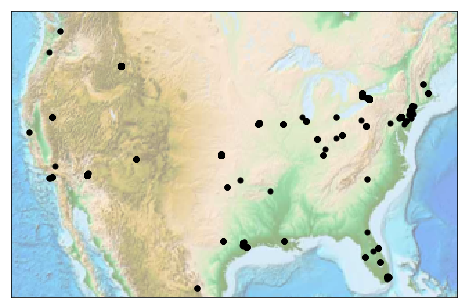

In [226]:
fig = plt.figure(figsize=(8, 8))

lower_long = -119
left_lat = 22
upper_long = -64
right_lat = 49

key = "INSERT API KEY"

m = Basemap(llcrnrlon=lower_long,llcrnrlat=left_lat,urcrnrlon=upper_long,urcrnrlat=right_lat,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting

#Praxair
for a in range(len(df2.index)):
  
    try:
        location = df2.iloc[a]["consignee_address"].replace(" ", "+")
        
        response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={0}{1}'.format(location,key))
        resp_json_payload = response.json()
        b = resp_json_payload['results'][0]['geometry']['location']
        lat = list(b.values())[0]
        long = list(b.values())[1]    
        name = a
    
        x, y = m(long, lat)
        plt.plot(x, y, 'ok', markersize=5)
        
    except:
        continue
    #plt.text(x, y, name, fontsize=12);

#Linde
for c in range(len(df3.index)):
       
    try:
        location = df3.iloc[c]["consignee_address"].replace(" ", "+")
        response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={0}{1}'.format(location,key))
        resp_json_payload = response.json()
        b = resp_json_payload['results'][0]['geometry']['location']
        lat = list(b.values())[0]
        long = list(b.values())[1]    
        name = c
    
        x, y = m(long, lat)
        plt.plot(x, y, 'ok', markersize=5)
        
    except:
        continue